# <font face = 'Impact' color = '#FFAEBC' > Getting Ready with our Third Mini-Project <font/>
#### <font face = 'Times New Roman' color = '#A16AE8'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
In this notebook, we will be importing packages and use them to load and explore data sets. We will be using the pandas package to load datasets and qdesc to explore both categorical and numerical variables. Functions to be used include pd.read_excel, pd.read_csv, head, qd.desc, qd.normcheck_dashboard, qd.freqdist_a, and qd.freqdist_to_excel.

# Angela B. Zarcedo


# <font face = 'Impact' color = '#FFAEBC' > Exploring Job Satisfaction and Employee Performance <font/>

In [5]:
# Importing the necessary packages for us to use certain functions.
import pandas as pd
import numpy as np
import qdesc as qd
import researchpy as rp

ModuleNotFoundError: No module named 'researchpy'

In [7]:
pip install researchpy

In [2]:
pip install qdesc

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [9]:
import os

In [11]:
# Loading a data set and storing it into a variable.
df1 = pd.read_excel("JobSatPerf.xlsx")
# Checking the first three rows of the data set.
df1.head(5)

,JobSat,EmpPerf,EmpID,Sex
0,3.09,3.96,224,Male
1,3.80,4.54,225,Male
2,3.08,4.39,226,Female
3,2.99,5.36,227,Female
4,3.00,4.68,228,Female


In [12]:
# Default way of doing descriptives in python.
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
JobSat,338.0,3.000000,1.000202,0.12,2.435,3.00,3.61,5.67
EmpPerf,338.0,5.000089,1.000221,1.55,4.350,5.03,5.64,7.82
EmpID,338.0,392.500000,97.716426,224.00,308.250,392.50,476.75,561.00


In [13]:
# Using the desc function from the qdesc package to perform descriptive analysis.
qd.desc(df1)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
JobSat,338.0,3.0,1.00,3.00,0.61,0.12,5.67,0.71,0.78
EmpPerf,338.0,5.0,1.00,5.03,0.65,1.55,7.82,0.21,0.78
EmpID,338.0,392.5,97.72,392.50,84.50,224.00,561.00,3.73,0.78


In [14]:
# Saving our results to a spreadsheet file.
res = qd.desc(df1)
res.to_excel("JobSatDescriptives.xlsx")

In [15]:
# Generate descriptive analysis for job satisfaction when grouped by sex.
qd.grp_desc(df1, 'JobSat', 'Sex')

,Sex,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Female,186,3.01,1.02,3.08,0.65,0.12,5.59,0.46,0.77
1,Male,152,2.98,0.98,2.94,0.60,0.17,5.67,0.60,0.77


In [16]:
# Generate descriptive analysis for employee performance when grouped by sex.
qd.grp_desc(df1, 'EmpPerf', 'Sex')

,Sex,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Female,186,5.01,1.01,5.04,0.64,1.55,7.44,0.45,0.77
1,Male,152,4.99,0.99,4.96,0.66,2.72,7.82,0.25,0.77



--- Variable: JobSat ---
  Anderson-Darling Statistic : 0.7146
  Critical Value (@ 5.0%) : 0.7780
  Decision : Fail to Reject Null


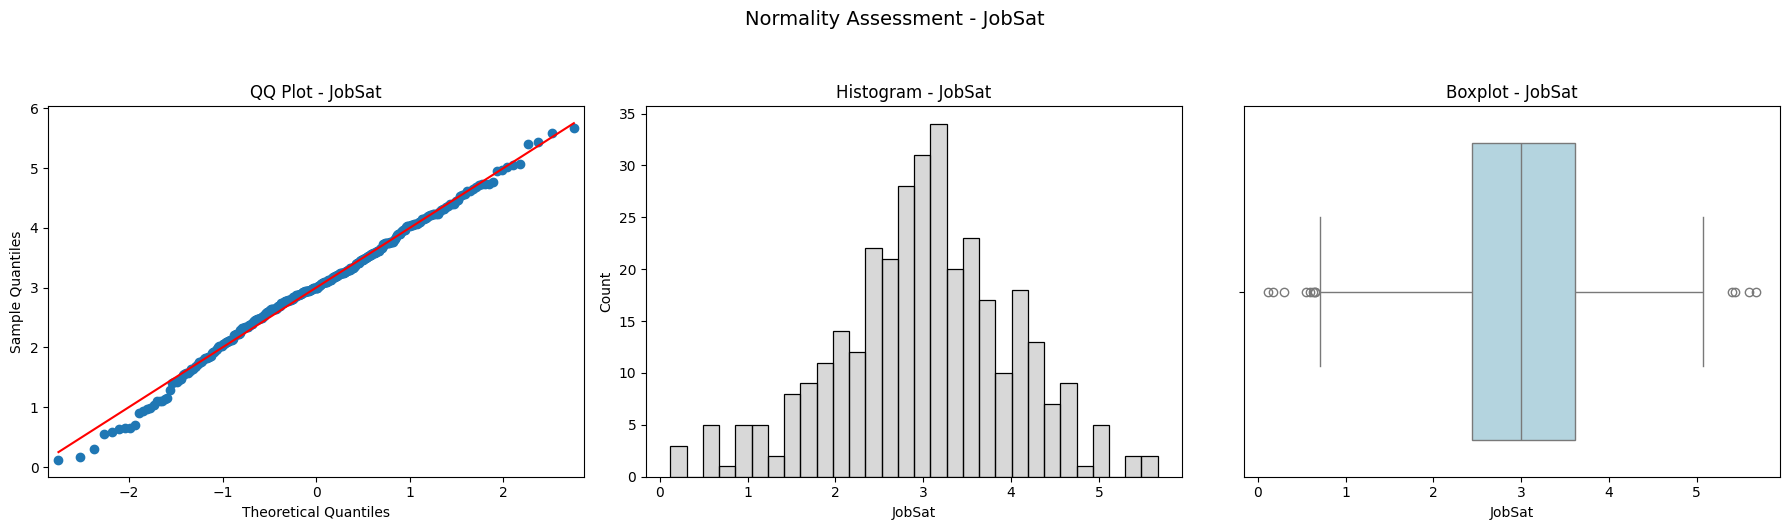


--- Variable: EmpPerf ---
  Anderson-Darling Statistic : 0.2137
  Critical Value (@ 5.0%) : 0.7780
  Decision : Fail to Reject Null


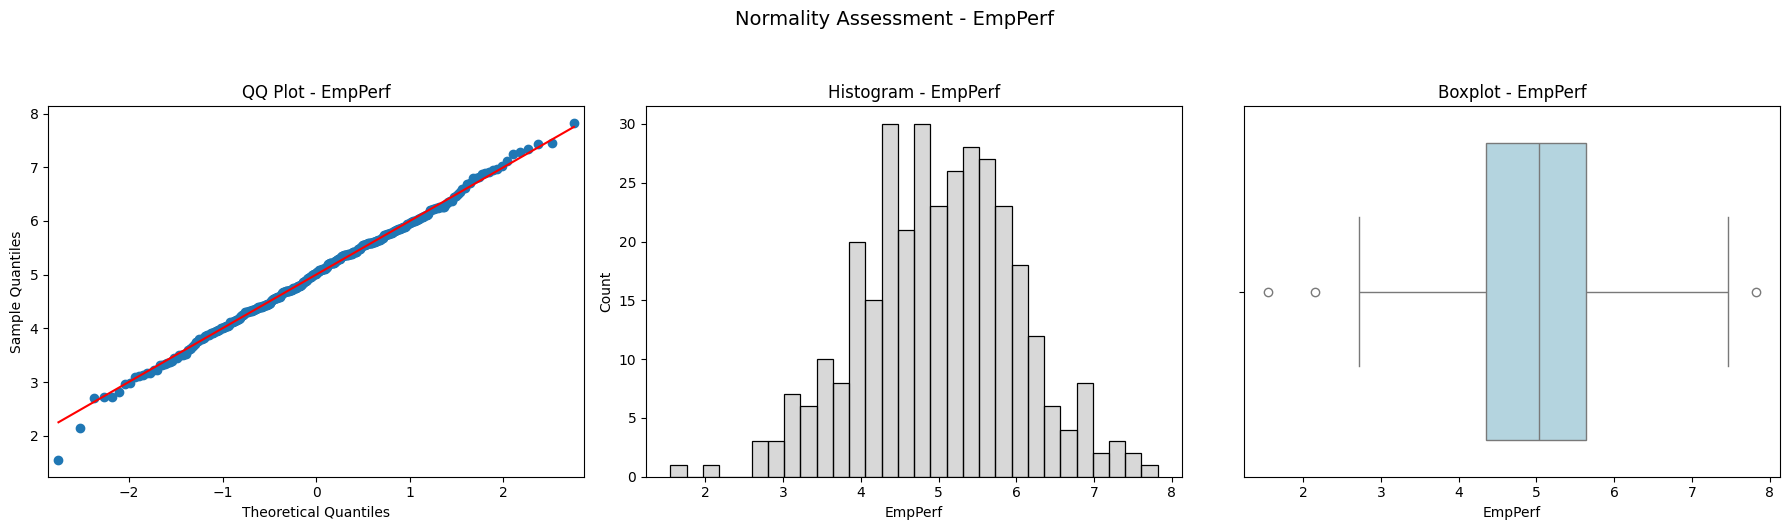


--- Variable: EmpID ---
  Anderson-Darling Statistic : 3.7253
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


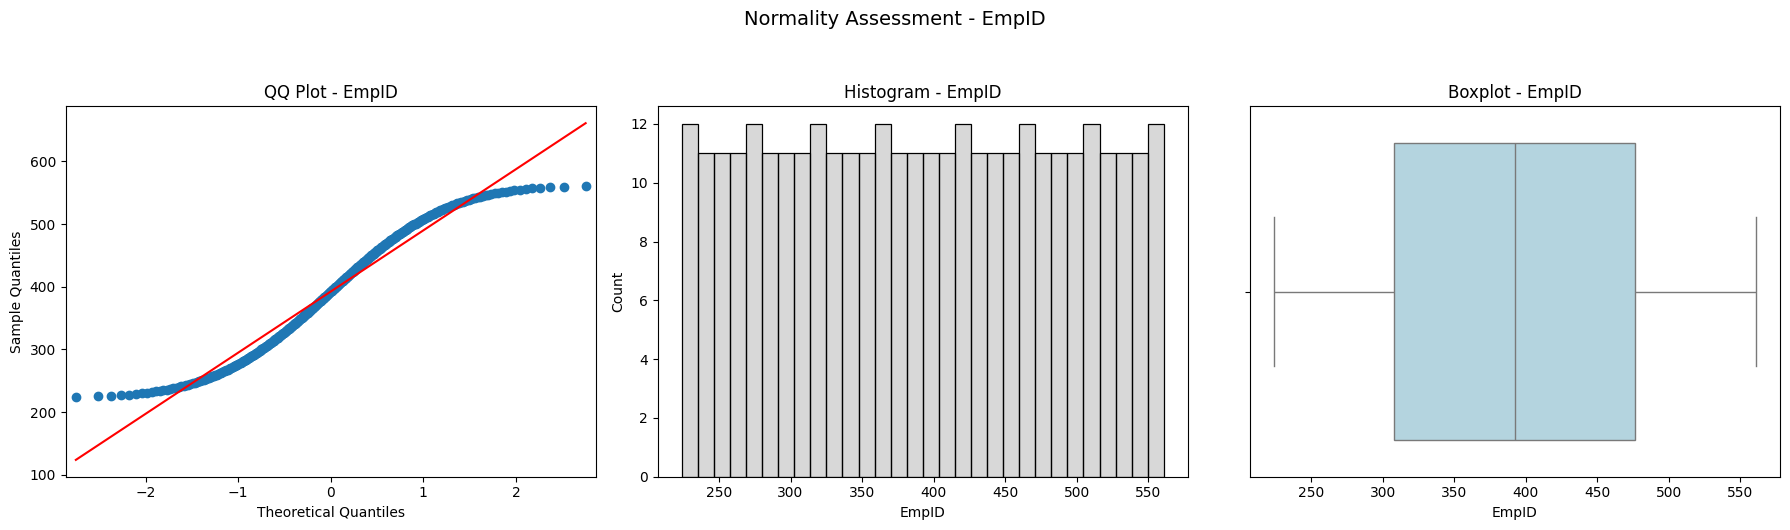

In [17]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(df1)

In [28]:
# Slicing the data frame to have a subset data for sex.
Male = df1[df1['Sex'] == 'Male']
Male.head()
# Slicing the data frame to only include the male.
# checking out the data subset.

,JobSat,EmpPerf,EmpID,Sex
0,3.09,3.96,224,Male
1,3.80,4.54,225,Male
5,3.30,3.81,229,Male
6,3.20,5.88,230,Male
7,1.77,3.45,231,Male


In [29]:
# Confirming that the subset is all males.
np.unique(Male.Sex)

array(['Male'], dtype=object)


--- Variable: JobSat ---
  Anderson-Darling Statistic : 0.6044
  Critical Value (@ 5.0%) : 0.7680
  Decision : Fail to Reject Null


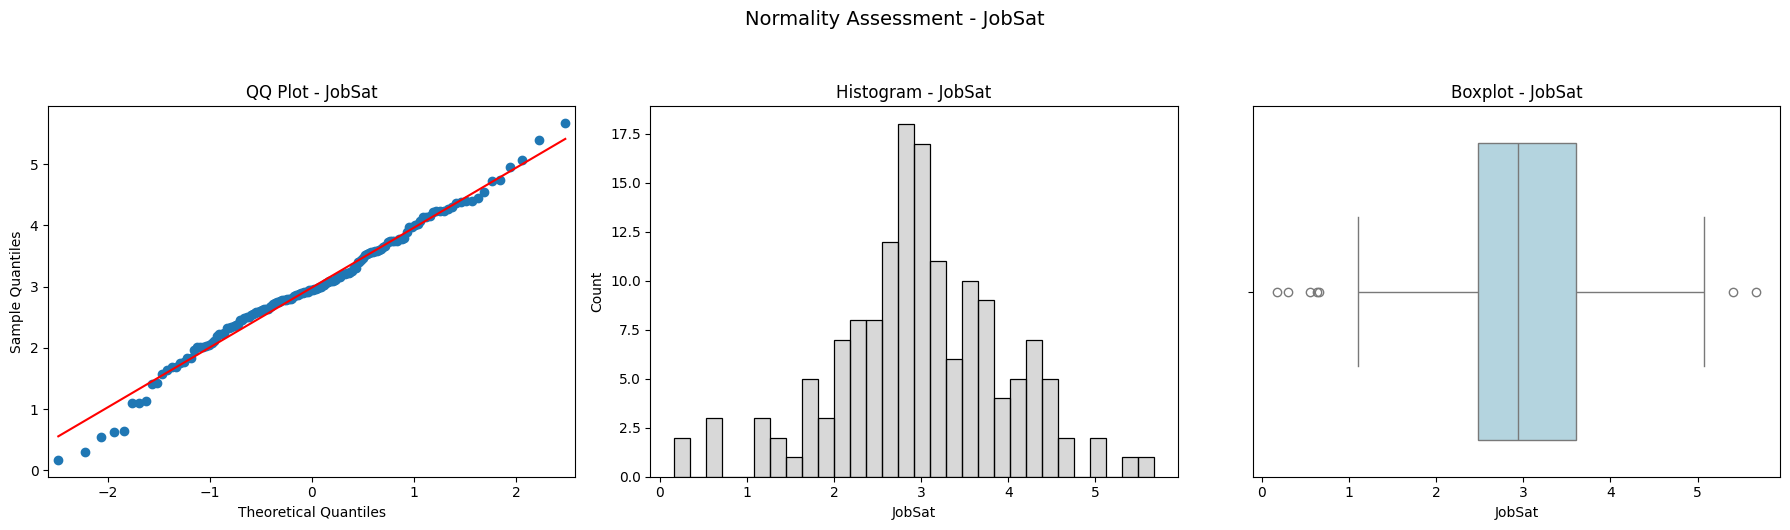


--- Variable: EmpPerf ---
  Anderson-Darling Statistic : 0.2527
  Critical Value (@ 5.0%) : 0.7680
  Decision : Fail to Reject Null


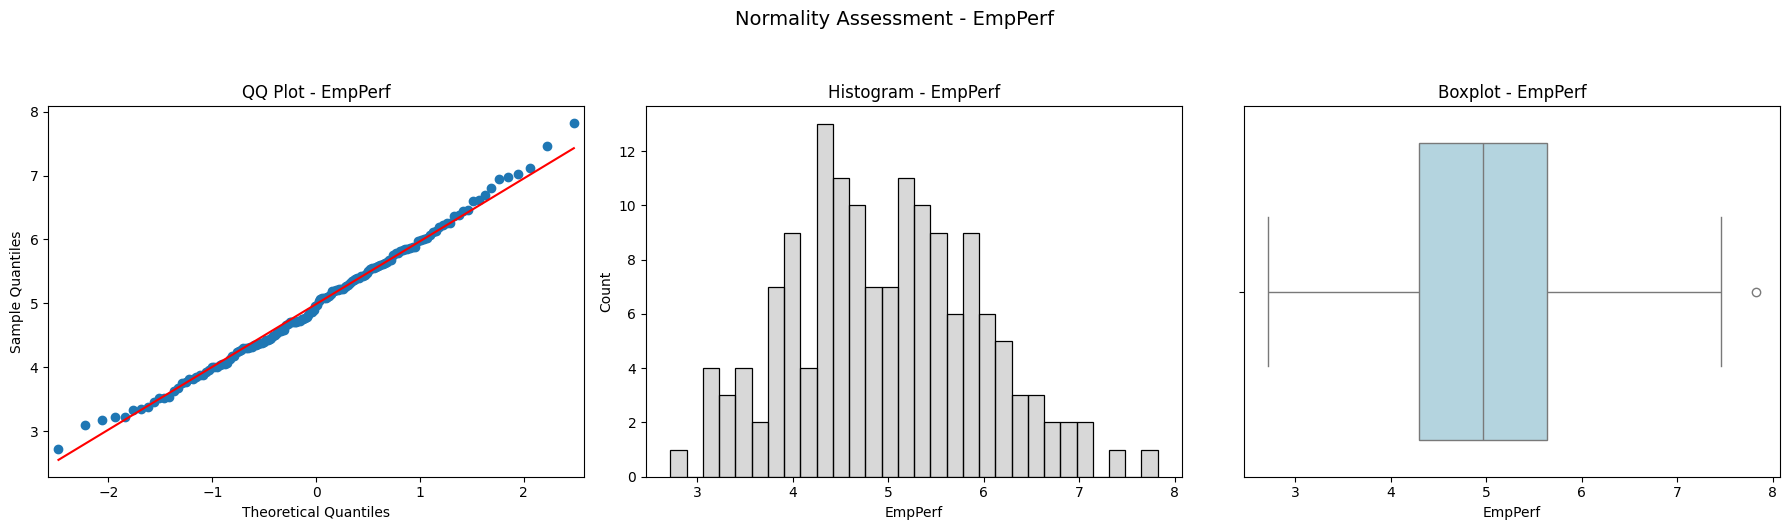


--- Variable: EmpID ---
  Anderson-Darling Statistic : 1.6408
  Critical Value (@ 5.0%) : 0.7680
  Decision : Reject Null


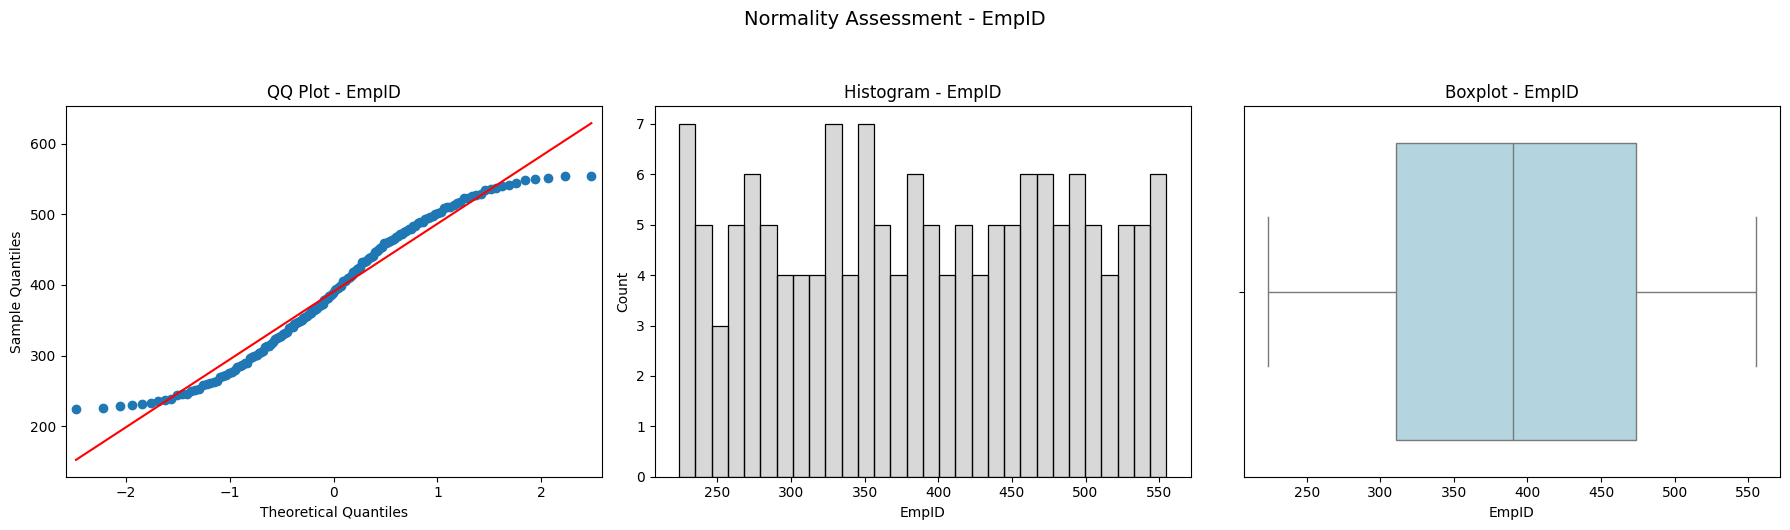

In [30]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(Male)

In [32]:
# Slicing the data frame to have a subset data for females.
Female = df1[df1['Sex'] == 'Female']
Female.head()
# Slicing the data frame to only include the females.
# checking out the data subset.

,JobSat,EmpPerf,EmpID,Sex
2,3.08,4.39,226,Female
3,2.99,5.36,227,Female
4,3.00,4.68,228,Female
8,2.94,4.79,232,Female
10,0.97,2.72,234,Female


In [33]:
# Confirming that the subset is all females.
np.unique(Female.Sex)

array(['Female'], dtype=object)


--- Variable: JobSat ---
  Anderson-Darling Statistic : 0.4607
  Critical Value (@ 5.0%) : 0.7710
  Decision : Fail to Reject Null


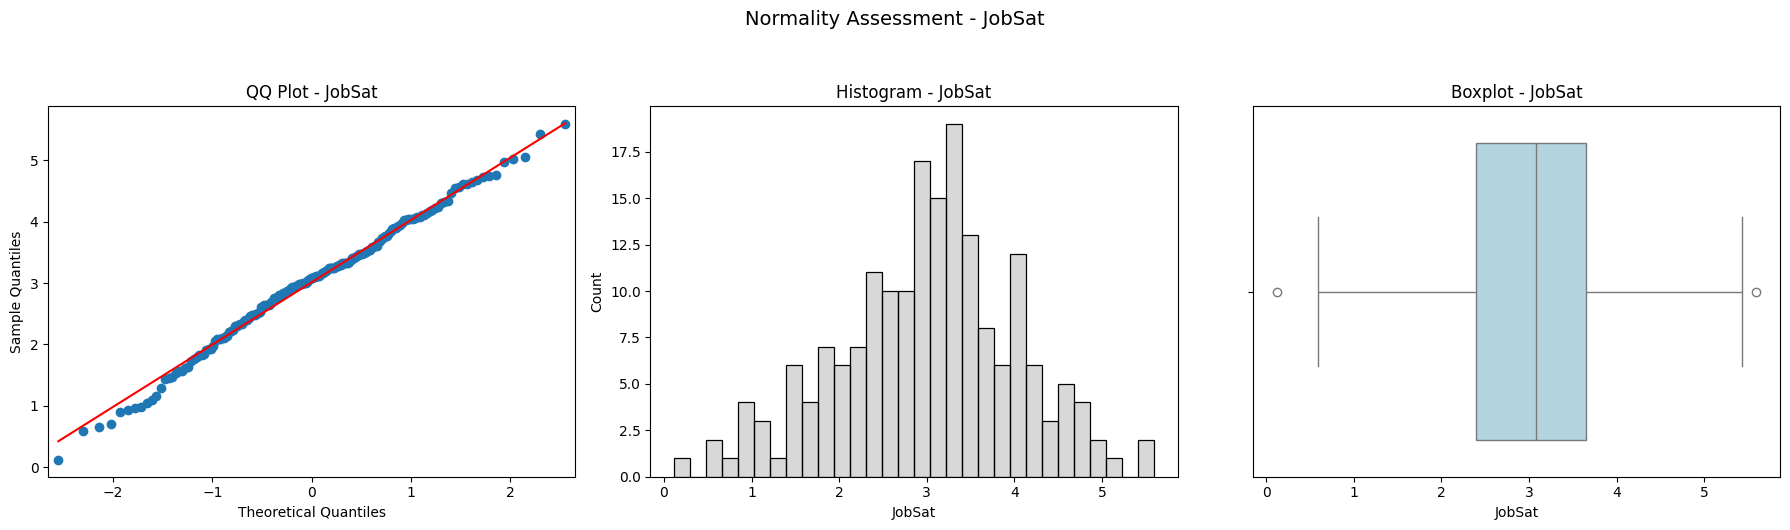


--- Variable: EmpPerf ---
  Anderson-Darling Statistic : 0.4538
  Critical Value (@ 5.0%) : 0.7710
  Decision : Fail to Reject Null


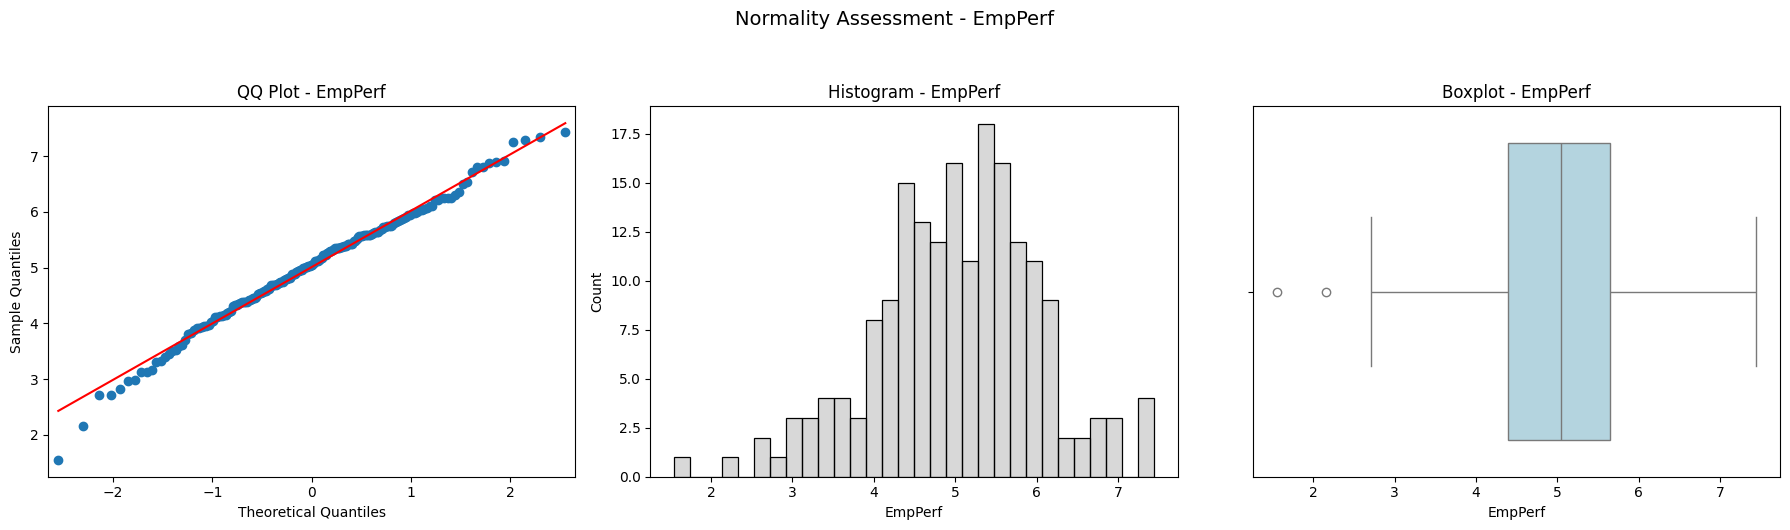


--- Variable: EmpID ---
  Anderson-Darling Statistic : 2.1675
  Critical Value (@ 5.0%) : 0.7710
  Decision : Reject Null


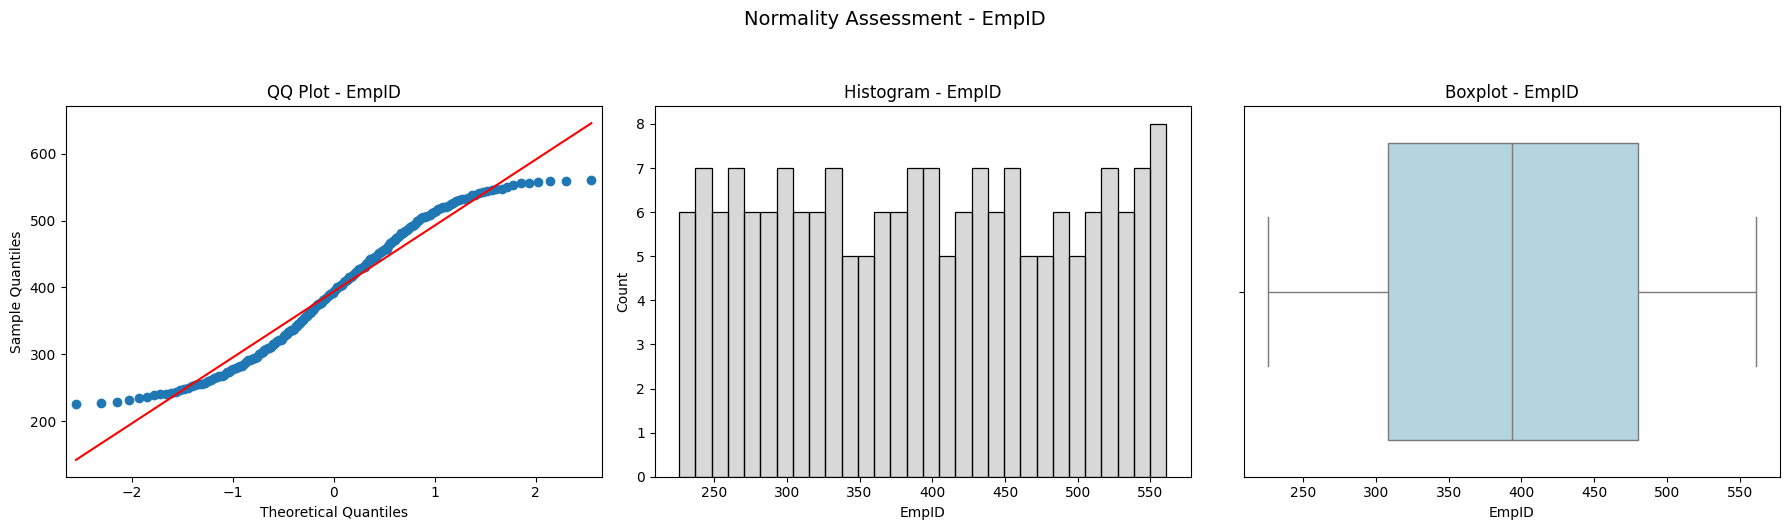

In [35]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(Female)

In [36]:
# Generating a frequency distribution for a specified variable: Sex
qd.freqdist(df1, 'Sex')

,Sex,Count,Percentage
0,Female,186,55.029586
1,Male,152,44.970414


In [45]:
# Generating a frequency distribution but this time have it store in an excel file and organized
# on a per sheet basis per categorical feature.
qd.freqdist_a(df1)
qd.freqdist_to_excel(df1, "JobSatCategorical.xlsx")

Frequency distributions written to JobSatCategorical.xlsx


In [44]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 5.3 MB/s eta 0:00:00
